In [ ]:
#1. Business Understanding/Overview
#2. Problem statement 
#3. Objectives
#4. Research Questions 
#5. Methodology 
#6. Success criteria
#7. Limitations/ Assumptions 
#8. Data Understanding 
#9. Data Cleaning
#- Handling missing values
#- Handling duplicates 
#- Feature engineer month
#10. Conclusions
#11. Recommendations

In [52]:
import pandas as pd

# Load data from the provided URL
url = 'https://www.stats.govt.nz/assets/Uploads/Annual-enterprise-survey/Annual-enterprise-survey-2023-financial-year-provisional/Download-data/annual-enterprise-survey-2023-financial-year-provisional.csv'
data = pd.read_csv(url)

# Display first few rows
print("Data Preview:\n", data.head())


Data Preview:
    Year Industry_aggregation_NZSIOC Industry_code_NZSIOC Industry_name_NZSIOC  \
0  2023                     Level 1                99999       All industries   
1  2023                     Level 1                99999       All industries   
2  2023                     Level 1                99999       All industries   
3  2023                     Level 1                99999       All industries   
4  2023                     Level 1                99999       All industries   

                Units Variable_code  \
0  Dollars (millions)           H01   
1  Dollars (millions)           H04   
2  Dollars (millions)           H05   
3  Dollars (millions)           H07   
4  Dollars (millions)           H08   

                                     Variable_name      Variable_category  \
0                                     Total income  Financial performance   
1  Sales, government funding, grants and subsidies  Financial performance   
2                Interest, divid

In [44]:
# Check for missing values
print("\nMissing Values:\n", data.isnull().sum())


Missing Values:
 Year                           0
Industry_aggregation_NZSIOC    0
Industry_code_NZSIOC           0
Industry_name_NZSIOC           0
Units                          0
Variable_code                  0
Variable_name                  0
Variable_category              0
Value                          0
Industry_code_ANZSIC06         0
dtype: int64


In [46]:
# Basic statistics
print("\nData Statistics:\n", data.describe())


Data Statistics:
                Year         Value
count  35932.000000  3.593200e+04
mean    2018.715963  1.747581e+04
std        3.205829  1.679113e+05
min     2013.000000 -1.523000e+05
25%     2016.000000  3.300000e+01
50%     2019.000000  1.450000e+02
75%     2021.000000  8.380000e+02
max     2023.000000  1.136140e+07


In [4]:
# Handle missing values (if any)
data = data.dropna()

# Convert relevant columns to appropriate data types if needed (e.g., dates)
# Assuming there's a 'Date' column
# data['Date'] = pd.to_datetime(data['Date'])

# Check data types
print("Data Types:\n", data.dtypes)


Data Types:
 Year                            int64
Industry_aggregation_NZSIOC    object
Industry_code_NZSIOC           object
Industry_name_NZSIOC           object
Units                          object
Variable_code                  object
Variable_name                  object
Variable_category              object
Value                          object
Industry_code_ANZSIC06         object
dtype: object


In [12]:
# Display column names
print(data.columns)


Index(['Year', 'Industry_aggregation_NZSIOC', 'Industry_code_NZSIOC',
       'Industry_name_NZSIOC', 'Units', 'Variable_code', 'Variable_name',
       'Variable_category', 'Value', 'Industry_code_ANZSIC06'],
      dtype='object')


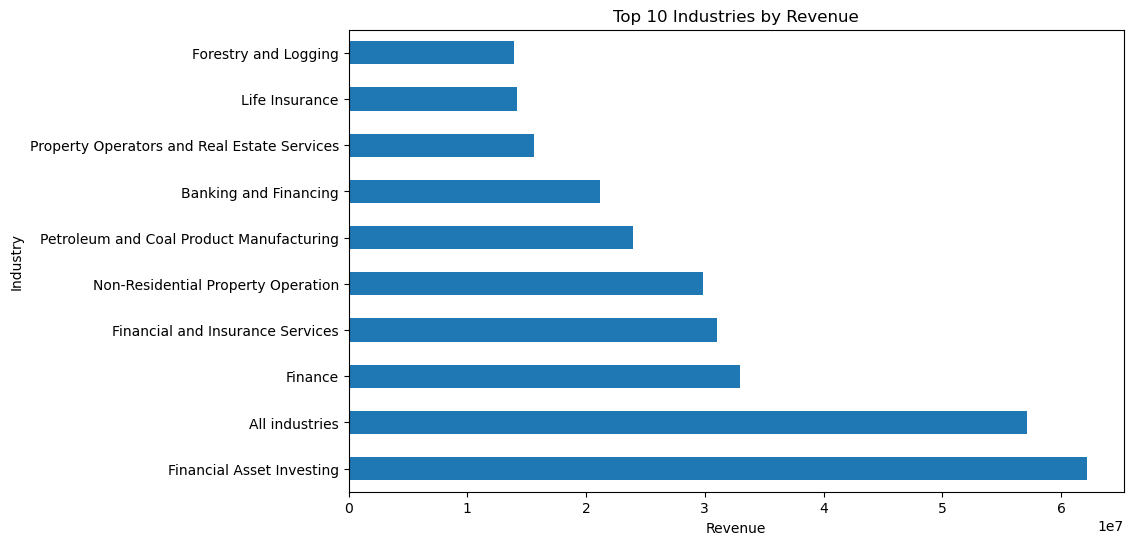

In [22]:
# Sort and select top 10 industries by revenue
top_industries = grouped_data.sort_values(ascending=False).head(10)

# Plot top 10 industries using a horizontal bar chart
top_industries.plot(kind='barh', figsize=(10, 6))
plt.title('Top 10 Industries by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Industry')
plt.show()


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Filter data for top 10 industries
top_industry_names = top_industries.index
filtered_data = data[data['Industry_name_NZSIOC'].isin(top_industry_names)]

# Prepare the data for modeling
# Convert categorical data to numerical using dummy variables
X = pd.get_dummies(filtered_data['Industry_name_NZSIOC'], drop_first=True)
y = filtered_data['Value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Display predictions vs actual values
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared Value: {r2}')


          Actual      Predicted
12528      227.0   89484.816456
24111      231.0   43992.033803
3119        24.0  141892.143678
12410     4882.0  161664.254545
28770       12.0   43992.033803
...          ...            ...
17415  1597900.0   78529.913580
18886      293.0   32609.495775
347        180.0   32609.495775
4956     22160.0   32609.495775
17006      163.0  141892.143678

[506 rows x 2 columns]
Mean Squared Error: 418694039186.14056
R-squared Value: 0.020991709370358214
